# <div align="center"> Indicadores para Universidades del grupo B</div>
* Universidad Nacional del Comahue
* Universidad del Salvador
- - -

In [66]:
#code1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("Set2"))


## 0. Análisis preliminar de edades al momento de la inscripción

Voy a trabajar con un .txt AUXILIAR para hacer un análisis del criterio de validez de datos de fechas/edades y la decisión respecto de que hacer con los datos dudosos.
El .txt contiene los datos del .txt requerido (dataset) más algunas columnas auxiliares.
En una etapa posterior (punto 1) se cambia al dataset final y se pueden eliminar las celdas del punto 0.

In [67]:
#code2
csv_file = '../notebooks/GBUNComahue_AUXILIAR.txt'
df_unc = pd.read_csv(csv_file, encoding='utf8', index_col=0)
csv_file = '../notebooks/GBUSalvador_AUXILIAR.txt'
df_us = pd.read_csv(csv_file, encoding='utf8', index_col=0)

## 0.a. Para la Universidad Nacional del Comahue

In [68]:
#code3
UNC = 'Universidad Nacional del Comahue'
df_unc.head(2)

,university,career,inscription_date,last_name,first_name,gender,fecha_nacimiento,postal_code,email,location,_age_ins_0,_age_ins_1,_age_ins_2,age
0,univ. nacional del comahue,diseño industrial,2020-11-20,harris,michelle,female,1917-10-13,7261,martinezjohn@hotmail.com,saladillo norte,103.106840,103.106840,103.106840,103
1,univ. nacional del comahue,contador público,2020-10-31,hill,amanda,female,1990-04-08,8129,tyler57@hotmail.com,17 de agosto,30.565994,30.565994,30.565994,30


- _age_ins_0 = calculada con los datos resultantes del proceso de extracción
- _age_ins_1 = cuando la edad da menor a 15* se reemplazó por NaN
- _age_ins_2 = cuando la edad da menor a 15* se reemplazó por la media de _age_ins

(*) de acuerdo a [INDEC, 2010] para el censo 2010 no hay población < 15 años de edad cursando estudios universitarios

>  Instituto Nacional de Estadística y Censos. (s.f.). Censo Nacional de Población, Hogares y Viviendas 2010. Cuadro P29. Total del país. Población de 5 años y más que asistió a un establecimiento educativo por nivel de educación alcanzado y completud del nivel, según sexo y grupo de edad. Año 2010. Recuperado el 9 de noviembre de 2022 de https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/Total_pais/P29-Total_pais.xls

    

Text(0.5, 0, 'Edad al momento de la inscripción')

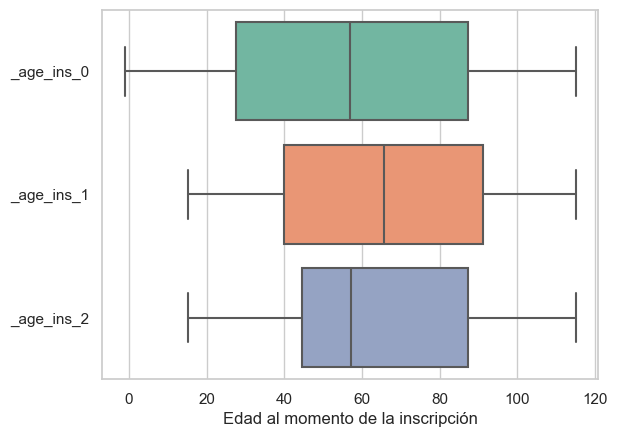

In [69]:
#code4
# analisis de _age_ins
p = sns.boxplot(data=df_unc[['_age_ins_0', '_age_ins_1','_age_ins_2']], orient='h')
p.set_xlabel("Edad al momento de la inscripción")

No se visualizan outliers.

In [70]:
#code5
df_unc[['_age_ins_0', '_age_ins_1', '_age_ins_2']].describe()

,_age_ins_0,_age_ins_1,_age_ins_2
count,1831.000000,1567.000000,1831.000000
mean,57.214914,65.627729,64.414740
std,33.909427,29.128418,27.107219
min,-1.032191,15.217287,15.217287
25%,27.546082,39.851605,44.496465
50%,57.036079,65.698817,57.214914
75%,87.291320,91.154507,87.291320
max,115.079707,115.079707,115.079707


En cuanto a la edad al momento de la inscripción se observa lo siguiente:
a) La media y la desviación estandar de la edad al momento de la inscripción es similar en las opciones 1 y 2.
b) La opción 1 (eliminar los registros con edades menores a 15) tiene el efecto de correr la distribución hacia los valores superiores, por lo que aumenta la mediana. La opción 2 ( reemplazar los registros con edades menores a 15 por la media de la distribución original) conserva este valor.
En base a esto se tomó la decisión de utilizar la opción 2.
Otra cuestión es que en el cuartil superior los registros tienen edades que van de 87 a 115 años, habría que discutir que se hace con ellos, si dejarlos o hacer un nuevo recorte, por ejemplo por expectativa de vida que para Argentina (según datos del INDEC) es de aprox. 77 años.


## 0.b. Para la Universidad del Salvador

In [71]:
#code6
US = 'Universidad del Salvador'
df_us.head(2)

,university,career,inscription_date,last_name,first_name,gender,fecha_nacimiento,location,email,postal_code,_age_ins_0,_age_ins_1,_age_ins_2,age
0,universidad del salvador,licenciatura en administración,2020-09-17,gonzalez,james,male,1942-03-08,coronel isleños,josephjackson@hotmail.com,2747,-21.470667,78.531387,78,78
1,universidad del salvador,licenciatura en relaciones del trabajo,2020-10-01,russell,christopher,male,1946-04-04,bellocq,pattersonjeremy@gmail.com,6535,-25.506342,74.495712,74,74


- _age_ins_0 = calculada con los datos resultantes del proceso de extracción
- _age_ins_1 = edad modificada

En este caso, las fechas estaban almacenadas en la tabla correspondiente con un formato en el que el año estaba guardado con las 2 últimas cifras. En el proceso de conversión se obtuvieron fechas de nacimiento que dan una edad al momento de la inscripción menores a 15 e incluso negativas.
Se realizó una corrección para cambiar las 2 primeras cifras del año de nacimiento de 20 a 19 cuando se encontró esta condición.
Igual que en el caso anterior 

Text(0.5, 0, 'Edad al momento de la inscripción')

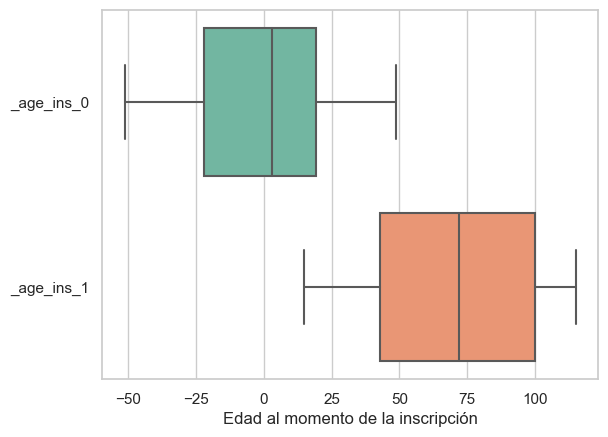

In [72]:
#code7
# analisis de _age_ins
p = sns.boxplot(data=df_us[['_age_ins_0', '_age_ins_1']], orient='h')
p.set_xlabel("Edad al momento de la inscripción")

In [73]:
#code8
df_us[['_age_ins_0', '_age_ins_1']].describe()

,_age_ins_0,_age_ins_1
count,1904.000000,1904.000000
mean,-0.118192,70.208883
std,26.965088,30.765507
min,-51.237192,14.844932
25%,-22.219484,42.979664
50%,3.125321,72.032964
75%,19.112644,100.075977
max,48.929136,115.060542


En este caso tampoco se observan outliers pero las edades corregidas se encuentran en un valor bastante alto. Igual consideración para las edades "altas" que en el caso de la Universidad del Comahue.

## 1. Descripción general de los datasets
### 1.1. Universidad Nacional del Comahue

In [215]:
unc_csv_file = '../datasets/GBUNComahue_process.txt'
df_unc = pd.read_csv(unc_csv_file)
UNC = 'Universidad Nacional del Comahue'

In [221]:
def description(df,name):
    print(f"{name}: La tabla tiene {df.shape[0]} filas y las siguientes columnas:")
    for i in df.columns:
        print((f" - {i}"))

description(df_unc, UNC)
df_unc['age'].describe()

Universidad Nacional del Comahue: La tabla tiene 1831 filas y las siguientes columnas:
 - university
 - career
 - inscription_date
 - last_name
 - first_name
 - gender
 - postal_code
 - email
 - location
 - age


count    1831.000000
mean       63.956308
std        27.095727
min        15.000000
25%        44.000000
50%        57.000000
75%        87.000000
max       115.000000
Name: age, dtype: float64

### 1.2. Universidad del Salvador

In [220]:
df_us = pd.read_csv(us_csv_file)
US = 'Universidad del Salvador'
description(df_us, US)
df_us['age'].describe()

Universidad del Salvador: La tabla tiene 1904 filas y las siguientes columnas:
 - university
 - career
 - inscription_date
 - last_name
 - first_name
 - gender
 - location
 - email
 - postal_code
 - age


count    1904.000000
mean       69.706933
std        30.763284
min        14.000000
25%        42.000000
50%        72.000000
75%       100.000000
max       115.000000
Name: age, dtype: float64

## 2. Carreras
### 2.1. Inscriptos por carrera
#### 2.1.1. Universidad Nacional del Comahue


In [97]:
df_career = df_unc.pivot_table(index='career', aggfunc='count', values='university')
df_career.rename(columns={"university": "count by career"}, inplace=True)
df_career.sort_values(by='count by career', ascending=False, inplace=True)
df_career.reset_index(inplace=True)
df_career

,career,count by career
0,medicina,72
1,diseño industrial,68
2,licenciatura en musicoterapia,66
3,licenciatura en planificación y diseño del pai...,63
4,licenciatura en ciencia política,63
5,licenciatura en artes,62
6,licenciatura en ciencias biológicas,62
7,diseño de imagen y sonido,61
8,licenciatura en administración,61
9,actuario,61


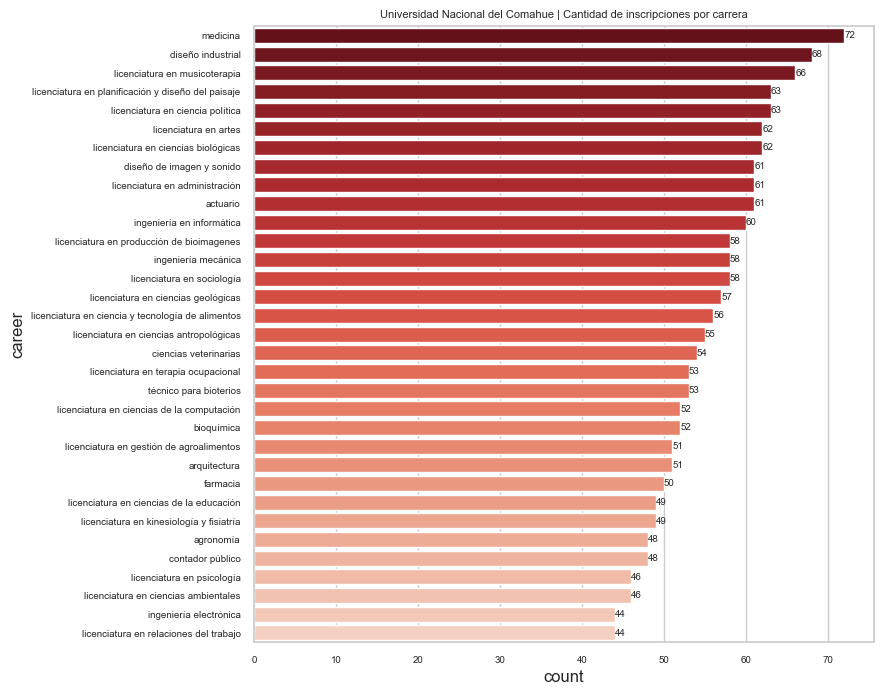

In [98]:
# Generador de graficos de barra

def chart_generator(df, name, columns:list, group):
    plt.figure(figsize=(8,8))
    plt.title(name, fontsize=8)
    df_carrera = df[columns].groupby(group).count().sort_values(columns[1], ascending=False)
    ax = sns.countplot(data=df, y='career', order=df_carrera.index, palette= sns.color_palette('Reds_r',40))
    ax.bar_label(ax.containers[0], label_type='edge', fontsize=7)
    plt.tick_params(axis='both', labelsize=7)

    return plt.show()

chart_generator(df_unc,
                f"{UNC} | Cantidad de inscripciones por carrera",
                ['career','university'],
                'career')


#### 2.1.2. Universidad del Salvador


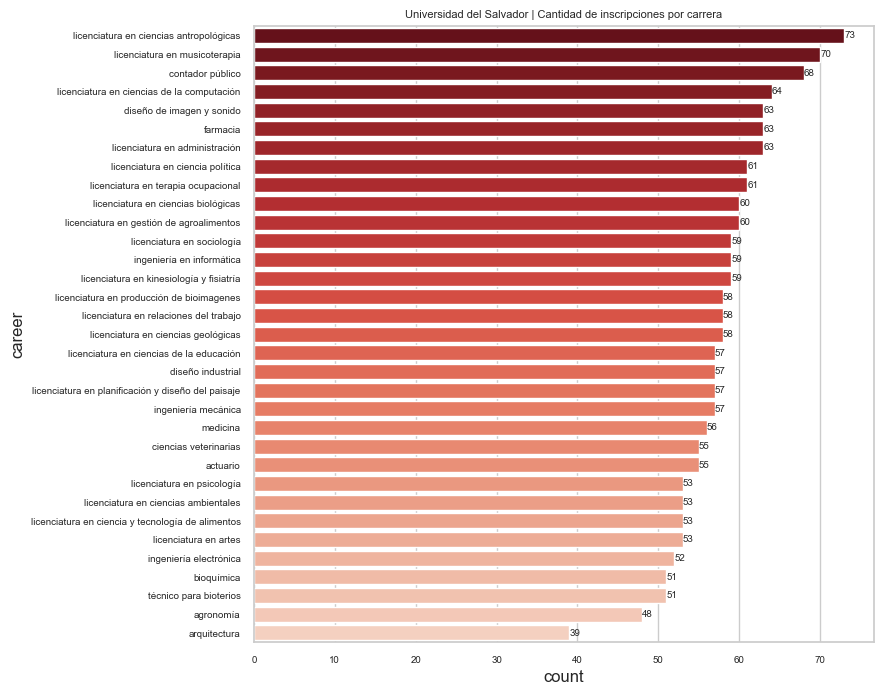

In [100]:
chart_generator(df_us,
                f"{US} | Cantidad de inscripciones por carrera",
                ['career','university'],
                'career')


### 2.2. Genero de los inscriptos
#### 2.2.1. Universidad Nacional del Comahue

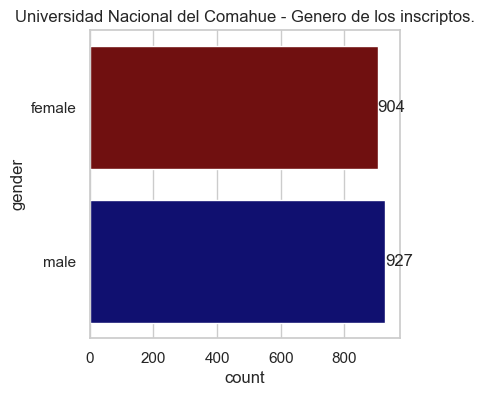

In [214]:
def gender_bar_generator(df,name, y):
    plt.figure(figsize=(4,4))
    plt.title(name)
    colours = ["maroon", "navy"]
    df_gender = sns.countplot(data=df, y=y, palette=colours)
    df_gender.bar_label(df_gender.containers[0], label_type='edge')
    return

gender_bar_generator(df_unc, f"{UNC} - Genero de los inscriptos.", 'gender')

#### 2.2.2. Universidad del Salvador

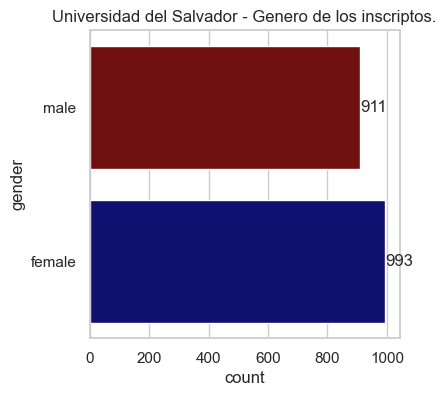

In [181]:
gender_bar_generator(df_us, f"{US} - Genero de los inscriptos.", 'gender')

### 2.3. Edad de los inscriptos
#### 2.3.1. Universidad Nacional del Comahue

,age_group
+ 85,0.264172
55-64,0.230600
65-84,0.164007
25-34,0.089708
35-44,0.086406
45-54,0.083104
15-24,0.082003


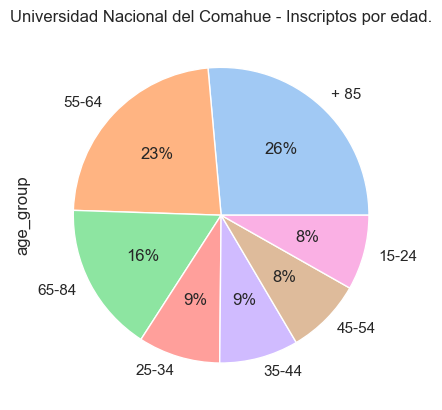

In [129]:
# Edades
def age_pie_generator(df,column, name):
    df['age_group'] = pd.cut(
                            df[column],
                            bins=[15, 25, 35, 45, 55, 65, 85, 200],
                            right=True,
                            labels=['15-24', '25-34', '35-44', '45-54', '55-64', '65-84', '+ 85',]
                            )

    df_age_group= pd.DataFrame(df['age_group'].value_counts('career'))
    display(df_age_group)
    colors = sns.color_palette('pastel')[0:7]
    return df_age_group['age_group'].plot(kind='pie',title={name}, subplots=True, colors=colors, autopct = '%0.0f%%')

df_age_unc = age_pie_generator(df_unc,'age', f"{UNC} - Inscriptos por edad.")


#### 2.3.2. Universidad del Salvador

,age_group
+ 85,0.389362
65-84,0.167553
55-64,0.092553
15-24,0.089362
35-44,0.088298
25-34,0.087766
45-54,0.085106


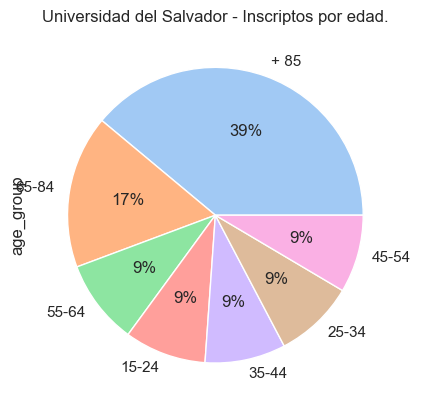

In [124]:
df_age_us = age_pie_generator(df_us,'age', f"{US} - Inscriptos por edad.")

### 2.4. Inscriptos por carrera y genero, para cada universidad
#### 2.4.1. Universidad Nacional del Comahue

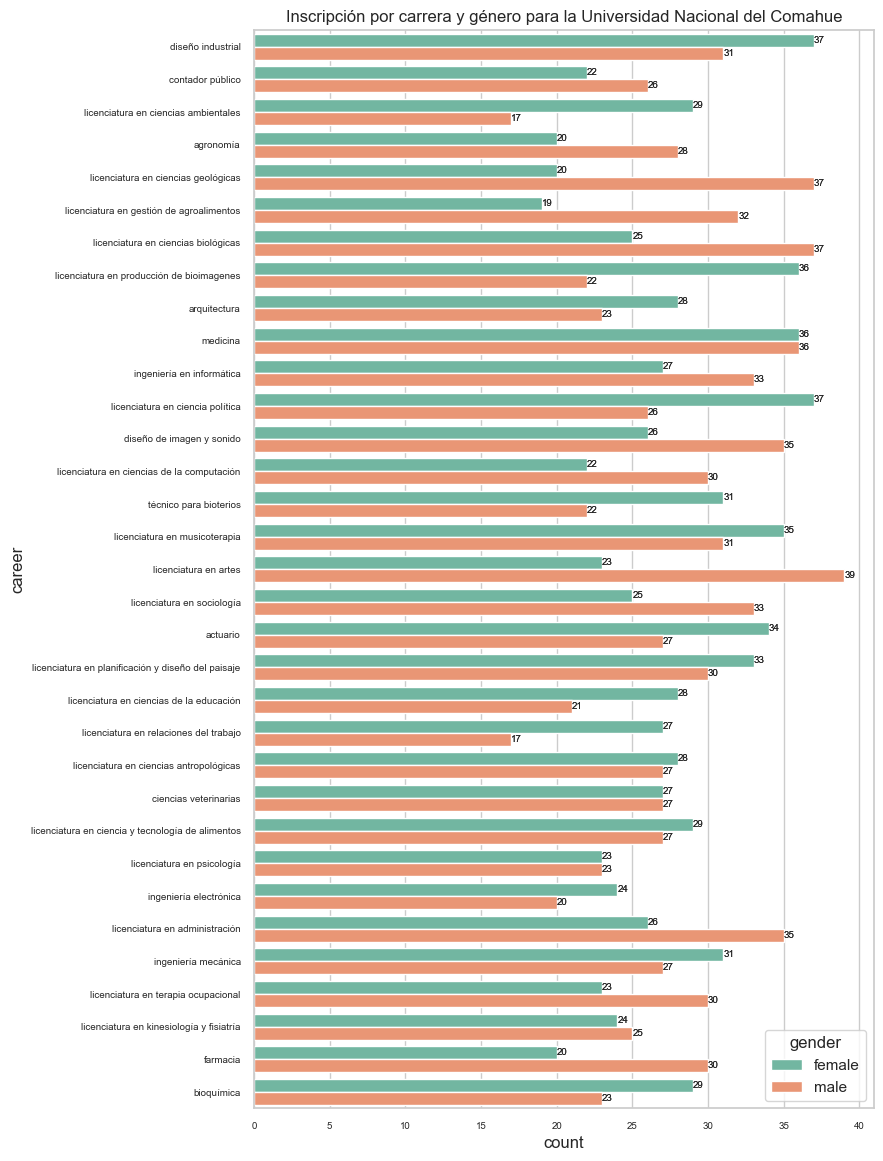

In [206]:

plt.figure(figsize=(8,14))
plt.title(f'Inscripción por carrera y género para la {UNC}')
ax = sns.countplot(df_unc, y='career', hue='gender')
for i in range(2):
    ax.bar_label(ax.containers[0], label_type='edge', fontsize=7)
    ax.bar_label(ax.containers[1], label_type='edge', fontsize=7)
plt.tick_params(axis='both', labelsize=7)

#### 2.4.2. Universidad del Salvador

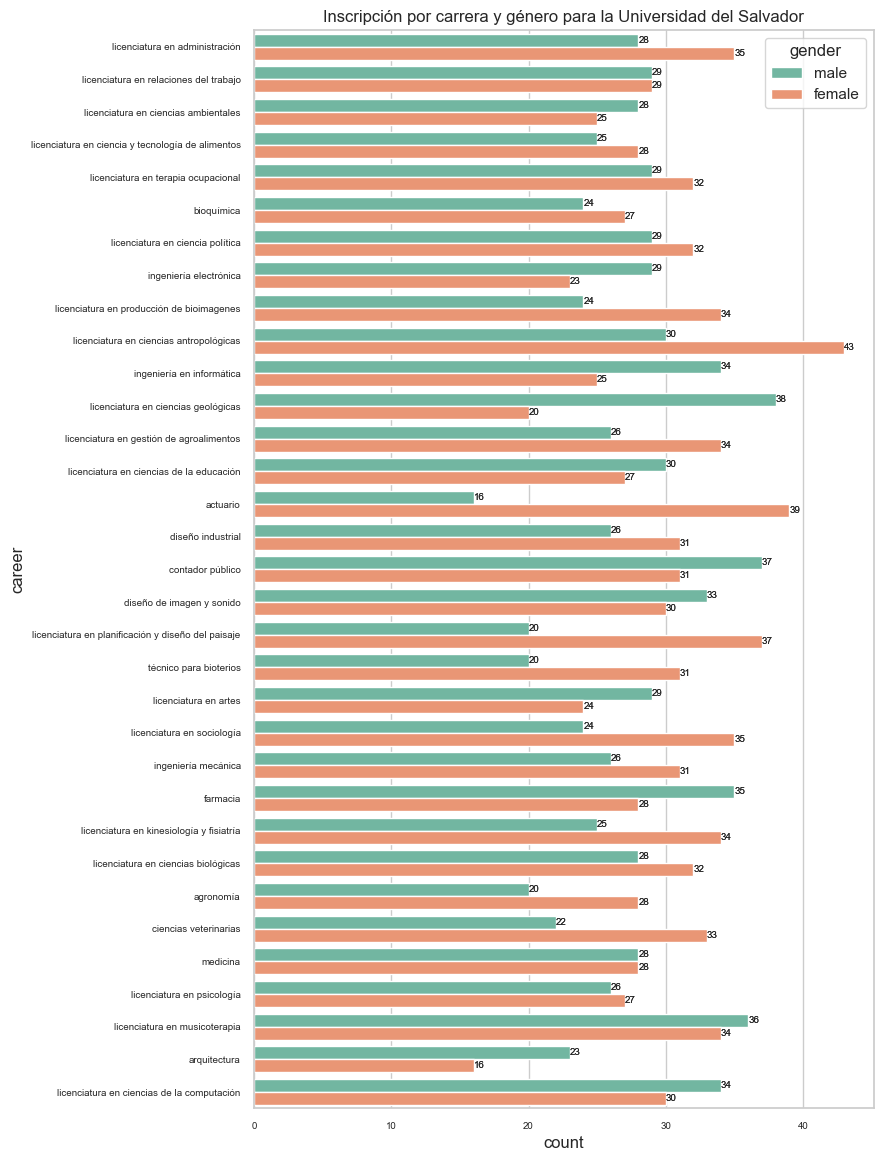

In [208]:

plt.figure(figsize=(8,14))
plt.title(f'Inscripción por carrera y género para la {US}')
ax = sns.countplot(df_us, y='career', hue='gender')
for i in range(2):
    ax.bar_label(ax.containers[0], label_type='edge', fontsize=7)
    ax.bar_label(ax.containers[1], label_type='edge', fontsize=7)
plt.tick_params(axis='both', labelsize=7)

### 2.5. Inscriptos por carrera - comparación entre las dos universidades

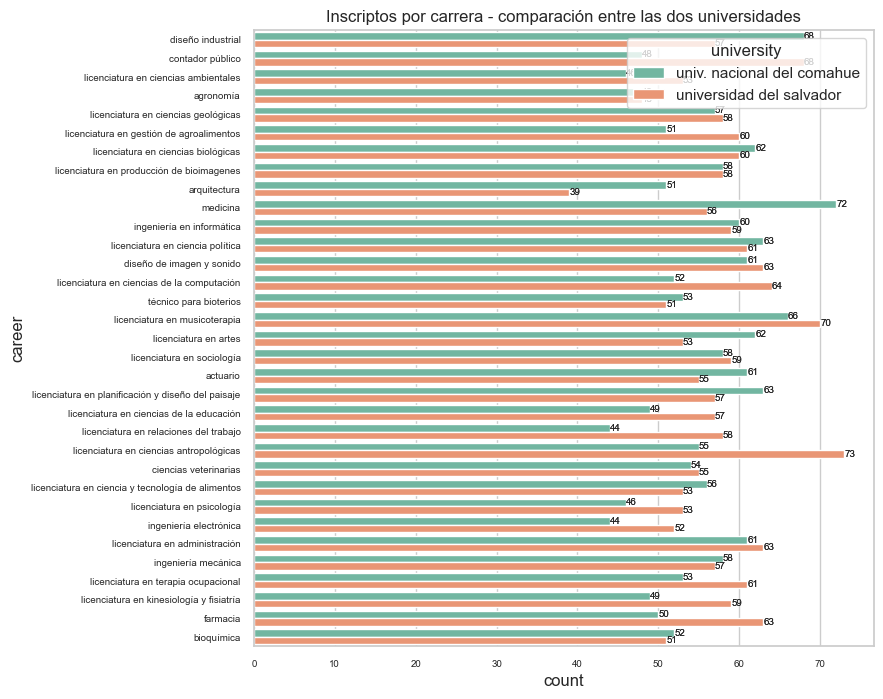

In [207]:
df_vertical = pd.concat([df_unc,df_us])
sns.set_palette(sns.color_palette("Set2"))
plt.figure(figsize=(8,8))
plt.title("Inscriptos por carrera - comparación entre las dos universidades")
ax = sns.countplot(data=df_vertical, y='career', hue='university')
#ax.bar_label(ax.containers[0], label_type='edge', fontsize=6)
#plt.tick_params(axis='both', labelsize=6)
for i in range(2):
    ax.bar_label(ax.containers[0], label_type='edge', fontsize=7)
    ax.bar_label(ax.containers[1], label_type='edge', fontsize=7)
plt.tick_params(axis='both', labelsize=7)
#plt.show()

# 3. Conclusiones.
Se observa que para el período analizado:
a) las 2 universidades tuvieron un número similar de inscriptos (1831 vs 1904).
b) que las 2 universidades cuentan con las mismas carreras (33).
c) que la composición de género mientras que para la UNC hay un 49% de población femenina, en la US esta es del 52%. 
d) que la carrera de medicina es la única que tiene una composición de genero 50/50 en las 2 universidaades. En la UNC veterinaria y psicología y en la US solo relaciones del trabajo reunen esta condición.
d) que respecto de las edades, en la UNC (con una media de edades de 64) los 2 grupos de mayor edad (65 y más) reunen el 42% de la población, mientras que para la US (media = 69.7) estos mismos grupos reunen el 56%.
entra distribuida de forma muy uniforme.